- Solve the time-independent Schrodinger equation (TISE)

\begin{equation*}
-\frac{\hbar^2}{2m} \frac{d^2 \phi(x)}{dx^2} + V(x) \phi(x) = E \phi(x)
\end{equation*}

by considering bound-state solutions.
- Acceptable solutions exist only if the eigenvalues are
  quantized, i.e., restricted to a discrete set of energies.
- To be acceptable, $\phi_n(x)$ must be finite for all $x$ and
  bounded for large $|x|$ so the $\phi_n(x)$ can be normalized.
- For finite $V(x)$, $\phi_n(x)$ and $d \phi_n(x)/dx$ must be
  continuous, finite, and single-valued for all $x$.
- As a 2nd-order differential equation, require two boundary
  conditions.
- Consider symmetric potentials, i.e., $V(x) = V(-x)$, so that
  $\phi(x)$ can be chosen to have definite parity.  For even parity,
  $\phi(-x) = \phi(x)$; odd parity solutions have $\phi(-x) =
  -\phi(x)$. The definite parity allows us to specify either $\phi$ or
  $\phi^\prime$ at $x=0$.import numpy as np



## Exercise 1:

1. Study and comment the code below.  Note that $\hbar = 1$ and $m=1$.  The numerical scheme is a discretized form of the 2nd-order ODE.  We could break it apart into two 1st-order ODEs.  But the following method is adequate for our purposes, i.e., 
$$ \phi_{j+1} = 2\phi_j - \phi_{j-1} - 2 dx^2 (E - V_j) \phi_j$$
Derive this discretized form of the TISE.

\begin{equation*}
\frac{d^2 \phi(x)}{dx^2} \approx \frac{1}{\Delta x^2} [\phi(x+\Delta x) - 2 \phi(x) + \phi(x - \Delta x)] \rightarrow \frac{1}{\Delta x^2}[\phi_{j+1} - 2 \phi_j + \phi_{j-1}]
\end{equation*}

So 

\begin{align*}
-\frac{1}{2} \frac{d^2 \phi(x)}{dx^2} + V(x) \phi(x) &= E \phi(x)\\
\rightarrow \frac{d^2 \phi(x)}{dx^2} &= -2 (E - V(x)) \phi(x)\\
\rightarrow \frac{1}{\Delta x^2}[\phi_{j+1} - 2 \phi_j + \phi_{j-1}] &= -2 (E - V_j) \phi_j\\
\end{align*}

Solving for the advanced position,

\begin{equation*}
\phi_{j+1} = 2\phi_j - \phi_{j-1} - 2 dx^2 (E - V_j) \phi_j
\end{equation*}

2. Choose an initial energy $E_0$ and parity.  You might start with the ground state energy (hint: this will be of order unity).  Will the ground state be even or odd parity?  Solve the TISE and determine whether you have to increase or decrease the initial energy to approach a bound solution.  An unbounded solution will diverge to $\pm \infty$ in the potential barrier.  Try different initial energies until you locate (approximately) the bound-state solution.  Plot the eigenfunction.

3. Reverse the parity and find the lowest energy bound state.

4. For both parities find the next energy level (approximately). (Hint: you might have found these by accident in part 2.)

5. Optional.  Write a function that automates the search for the bound-states.

odd E0:  2 E_n:  [4.277261393913397]
odd E0:  4 E_n:  [4.277261393913397]
odd E0:  6 E_n:  [4.277261393913397]
odd E0:  8 E_n:  [4.277261393913397]
odd E0:  10 E_n:  [4.277261393913397, 17.053914171241463]
odd E0:  12 E_n:  [4.277261393913397, 17.053914171241463]
odd E0:  14 E_n:  [4.277261393913397, 17.053914171241463]
odd E0:  16 E_n:  [4.277261393913397, 17.053914171241463]
odd E0:  18 E_n:  [4.277261393913397, 17.053914171241463]
odd E0:  20 E_n:  [4.277261393913397, 17.053914171241463]
even E0:  2 E_n:  [4.277261393913397, 17.053914171241463, 1.0766551541015121]
even E0:  4 E_n:  [4.277261393913397, 17.053914171241463, 1.0766551541015121]
even E0:  6 E_n:  [4.277261393913397, 17.053914171241463, 1.0766551541015121, 9.66990648965641]
even E0:  8 E_n:  [4.277261393913397, 17.053914171241463, 1.0766551541015121, 9.66990648965641]
even E0:  10 E_n:  [4.277261393913397, 17.053914171241463, 1.0766551541015121, 9.66990648965641]
even E0:  12 E_n:  [4.277261393913397, 17.053914171241463, 

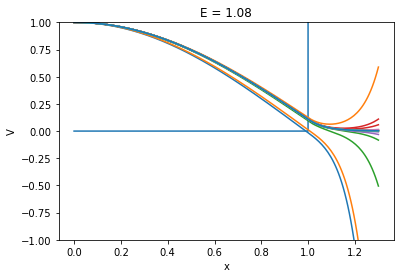

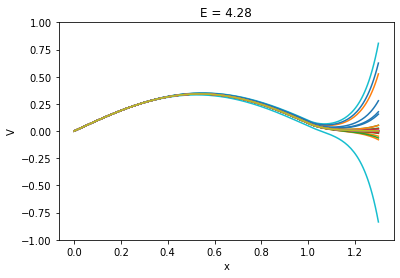

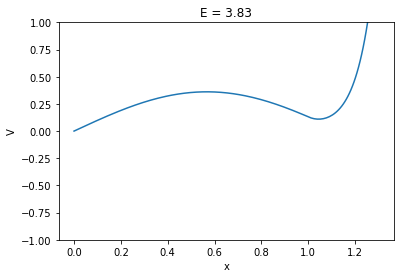

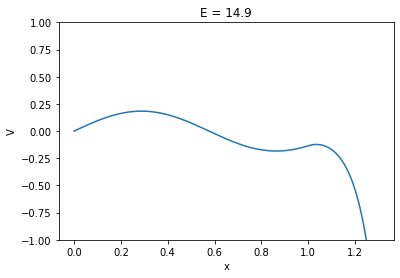

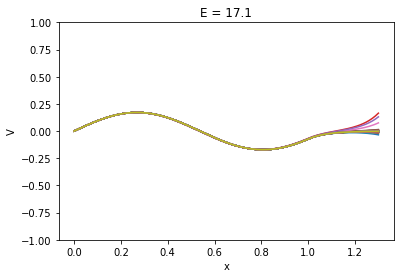

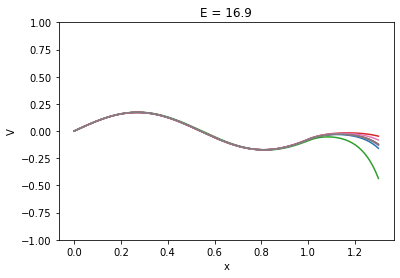

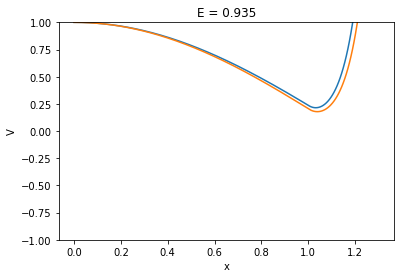

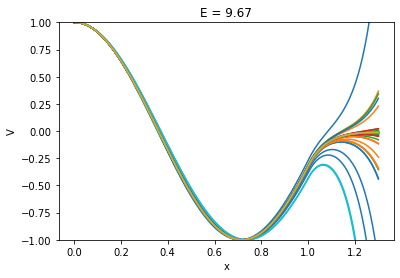

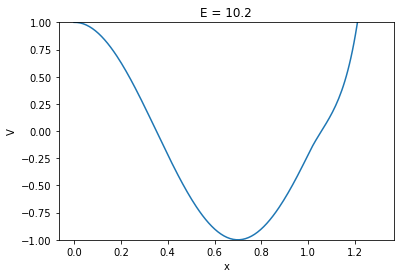

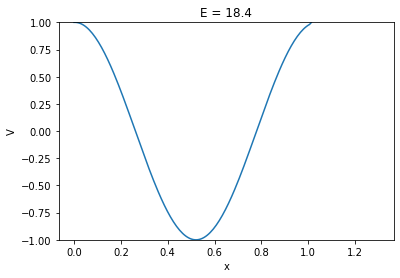

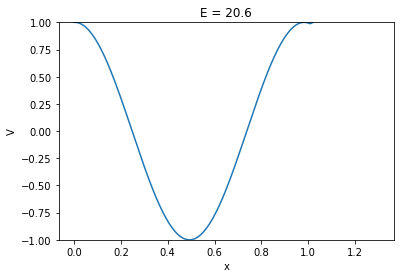

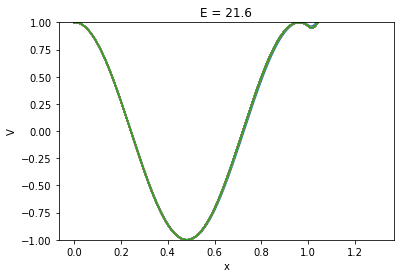

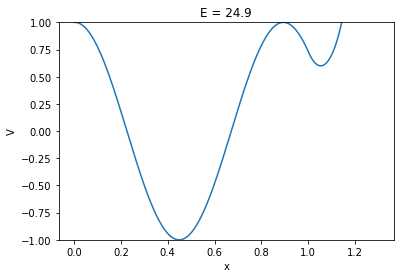

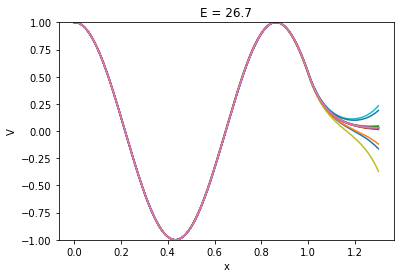

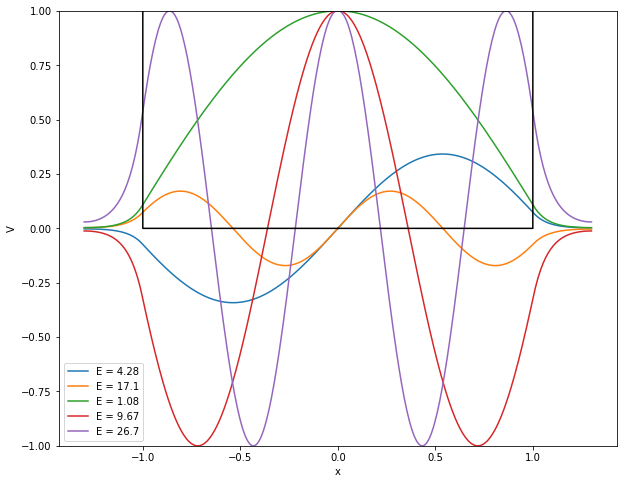

In [3]:

import matplotlib.pyplot as plt

def get_potential():
    a = 1.0
    V = np.zeros(len(x))
    wh = np.where(abs(x) >= a)
    V[wh[0]] = V0
    plt.plot(x,V)
    return V

def solve_TISE(E,parity):
    phi = np.zeros(len(x)) 
    dx = x[1]-x[0]
    if parity == 'odd':
        phi[0] = 0
        phi[1] = dx
    if parity == 'even':
        phi[0] = 1
        phi[1] = 1
    for j in range(1,len(x)-1):     
        phi[j+1] = 2*phi[j] - phi[j-1] - 2*dx**2*(E - V[j])*phi[j]    #full time step
        if abs(phi[j+1]) > np.max(V):
            return phi, True
    return phi, False

def iterate_E(E,parity):
    deltaE = 1.0
    cnt = 0
    pltcnt = 0
    error = False
    sign_dE = 1.0
    phi, error = solve_TISE(E,parity)
    dphi0 = phi[-1] - phi[-2]
    while (error == False) and (cnt < 500):
        E = E + (sign_dE)*deltaE
        phi, error = solve_TISE(E,parity)
        dphi1 = phi[-1] - phi[-2]
        if (abs(dphi1) < epsilon) and (error == False):
            return E, phi, error
        elif abs(dphi1) > abs(dphi0):
            sign_dE = -1.0*sign_dE
        deltaE = deltaE*0.90
        dphi0 = dphi1
        cnt += 1  
        pltcnt += 1
        if (pltcnt > 10):
            plt.figure(int(E))
            plt.plot(x,phi)
            plt.xlabel('x')
            plt.ylabel('V')
            plt.title("E = {:.3}".format(E))
            plt.ylim(-1,1)
            pltcnt = 0
    return E, phi, error

def shooting_method(parity):
    E0 = 1.5
    [E, phi, error] = iterate_E(E0,parity)
    Earr.append(E)
    phiarr.append(phi)
    pararr.append(parity)
    E0 = [2,4,6,8,10,12,14,16,18,20]
    for i in range(len(E0)):
        print(parity,"E0: ",E0[i],"E_n: ",Earr)
        E1 = E
        [E, phi, error] = iterate_E(E0[i],parity)
        if ((E > E1+0.5) and (error == False) and (abs(phi[-1]-phi[-2]) < epsilon)):
            Earr.append(E)
            phiarr.append(phi)
            pararr.append(parity)

#-----------------------------------------------------------------------------------------
            
x = np.linspace(0,1.3,200)
dx = x[1]-x[0]
V0 = 100.0
epsilon=1e-6
V = get_potential()
Earr = []
phiarr = []
pararr = []

shooting_method('odd')
shooting_method('even')

plt.figure(figsize=(10,8))
phiarr = np.asarray(phiarr)
for i in range(len(Earr)):
    if pararr[i] == 'even':
        plt.plot(np.concatenate((np.flip(-x,0),x)),np.concatenate((np.flip(phiarr[i,:],0),phiarr[i,:])),\
                 label="E = {:.3}".format(Earr[i]))
    elif pararr[i] == 'odd':
        plt.plot(np.concatenate((np.flip(-x,0),x)),np.concatenate((np.flip(-phiarr[i,:],0),phiarr[i,:])),\
                 label="E = {:.3}".format(Earr[i]))

plt.legend()
plt.plot(x,V,'k',-x,V,'k')
plt.xlabel('x')
plt.ylabel('V')
plt.ylim(-1,1)
plt.show()

## Random walk analysis of quantum systems

- Monte Carlo approach based on the relation of the
  Schrodinger equation to a diffusion process in *imaginary*
  time.
- Substitute $\tau = i t/\hbar$ into the TISE for a free particle, 

\begin{equation*}
\frac{\partial \psi(x,\tau)}{\partial \tau} = \frac{\hbar^2}{2m}
\frac{\partial^2 \psi(x,\tau)}{\partial x^2}
\end{equation*}

where we interpret the wave function as a probability density in a
diffusion process with a diffusion coefficient $D = \hbar^2/2m$.
- Instead of solving Schrodinger's equation directly, we can
  replace it with an equivalent random walk problem.
- Since Schrodinger's equation is *linear* (i.e., superposition
  of solutions is also a solution) it is valid to solve by considering
  many non-interacting particles.
- How do we interpret the potential $V(x)$?  Rewrite
  Schr\"{o}dinger's equation as

\begin{equation*}
\frac{\partial \psi(x,\tau)}{\partial \tau} = \frac{\hbar^2}{2m}
\frac{\partial^2 \psi(x,\tau)}{\partial x^2} - V(x) \psi(x,\tau)
\end{equation*}

- If $V\psi$ were the only term on the RHS, we would treat this as
  a source or loss term ($V(x)$ is a rate).
- The complete equation can be viewed as a diffusion equation with
  a source/loss term, where the number of particles increases or
  decreases depending on the sign of $V(x)$.
- The general solution is

\begin{equation*}
\psi(x,\tau) = \sum_n c_n \phi_n(x) e^{-E_n t}
\end{equation*}

- For $\tau \rightarrow \infty$ (consider long term evolution of
  the diffusion equation) the dominant term is the ground
  state energy, 

\begin{equation*}
\psi(x,\tau) \rightarrow c_0 \phi_0(x) e^{-E_0 \tau}
\end{equation*}

which means we can solve for $\phi_0$ and $E_0$ for arbitrary $V(x)$.
- There is a major problem with this method.  For large $\tau$,
  $\psi(x,\tau)$ will decay to zero unless $E_0 = 0$.  But this is not
  the correct solution!
- The trick is to measure $E_0$ from an arbitrary reference
  potential $V_{ref}$, which is adjusted to determine the steady state
  distribution (eigenvector) and associated $E_0$ (eigenvalue).
- Instead solve

\begin{equation*}
\frac{\partial \psi(x,\tau)}{\partial \tau} = \frac{\hbar^2}{2m}
\frac{\partial^2 \psi(x,\tau)}{\partial x^2} - [V(x) - V_{ref}] \psi(x,\tau)
\end{equation*}

so that

\begin{equation*}
\psi(x,\tau) \approx c_0 \phi_0(x) e^{-(E_0-V_{ref}) \tau}
\end{equation*}

- Integrate w.r.t. $x$ and note that $\partial \psi/\partial x
  \rightarrow 0$ in the limit $|x| \rightarrow \infty$,

\begin{equation*}
\int \frac{\partial \psi(x,\tau)}{\partial \tau}dx = - \int V(x)
\psi(x,\tau) dx+ \int V_{ref} \psi(x,\tau)dx
\end{equation*}

- Differentiate the general (ground state) solution w.r.t. $\tau$,

\begin{equation*}
\frac{\partial \psi(x,\tau)}{\partial \tau} = (V_{ref} - E_0) \psi(x,\tau)
\end{equation*}

- Thus 

\begin{equation*}
\int (V_{ref} - E_0) \psi(x,\tau) dx = - \int V(x)
\psi(x,\tau) dx+ \int V_{ref} \psi(x,\tau)dx.
\end{equation*}

- Cancelling the $V_{ref}$ terms,

\begin{equation*}
E_0\int \psi(x,\tau) dx =  \int V(x)
\psi(x,\tau) dx
\end{equation*}

- Solving for $E_0$ yields

\begin{equation*}
E_0 = \frac{ \int V(x)
\psi(x,\tau) dx}{\int \psi(x,\tau) dx}
\end{equation*}

- If $\psi(x,\tau)$ is related the number of particles $n_i$ at
  $x_i$ at time $\tau$,
  then in terms of the random walk model,

\begin{equation*}
E_0 = \langle V \rangle = \frac{\sum n_i V(x_i)}{n_i}
\end{equation*}

## Rules of the random walk solution for $\phi_0$ and $E_0$:

1. Place $N_0$ particles at random initial locations $-1 < x_i < 1$.

2. Compute the initial reference potential, $V_{ref} = \frac{1}{N_0} \sum_i V_i$.

3. Randomly move a particle left or right with step length $\Delta s$ where $\Delta s^2 = D \Delta \tau$.  We will use "dimensionless" units $\hbar = 1$ and $m = 1$ such that $D = \frac{1}{2}$.

4. Compute $\Delta V = [V(x) - V_{ref}] \Delta \tau$ and a random number $0 < r < 1$.  If $\Delta V > 0$ and $r < \Delta V$, then remove the particle (loss process).  If $\Delta V < 0$ and $r < -\Delta V$, then add a particle (source process).

5. Repeat steps 3-4.  Then change the reference potential to
$$ V_{ref} = \langle V \rangle - \frac{1}{N_0}(N- N_0) \Delta \tau$$ 
where $N$ is the new number of particles and $\langle V \rangle$ is the mean potential energy of the $N$ particles.

5. Iterate until the estimate of the ground state energy has reached a steady state energy eigenvalue $E_0$.  The distribution of the particles approximates the eigenfunction $\phi_0$.

# Exercise 2:

1. Study the code below and comment.

2. Determine the ground state energy for $V(x) = \frac{1}{2} x^2$.  Choose the number of particles  $N_0=1000$, step length $ds = 0.1$, and $nsteps = 100$. 

3. Increase $N_0$ and $nsteps$ until you are satisfied that the solution as converged.  Estimate the error by running $ntrials$ and determine the standard deviation of the mean. 

4. Plot the distribution of particles and discuss whether this makes sense for the ground state wave function based on the results from the square potential well.  You might find the following line of code to be useful for plotting,

```python
plt.hist(x,density = True, bins=40)
```
**The ground state should be even parity and single peaked.  So this solution makes sense.**

trial... 0
trial... 1
trial... 2
trial... 3
trial... 4
trial... 5
trial... 6
trial... 7
trial... 8
trial... 9
E0:  0.35456290145021624 +/- 0.0007817517709263684


Text(0, 0.5, 'V(x)/f(x)')

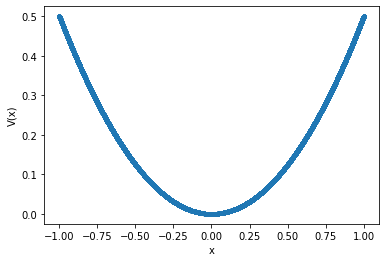

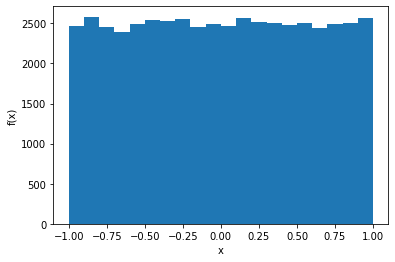

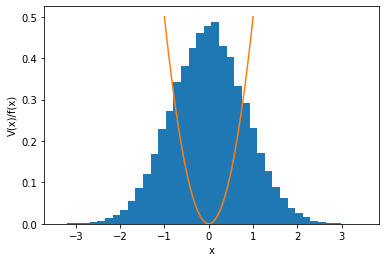

In [16]:
def initialize():
    x = -1.0 + 2*np.random.rand(N)
    return x

def potential(x):  #potential function
    return 0.5*x*x

def get_Vref():
    Vref = V.mean() - (N-N0)*dtau/N0
    return Vref

def move_particle(x):
    r = np.random.rand(N)
    left = np.where(r < 0.5)
    right = np.where(r >= 0.5)
    x[left[0]] = x[left[0]] - ds
    x[right[0]] = x[right[0]] + ds
    return x

def source_loss(x,V):
    dV = (V - Vref)*dtau  # V is a rate, i.e., per unit tau
    dVpos = dV[dV > 0.0]
    xpos = x[dV > 0.0]
    r = np.random.rand(len(dVpos))
    xpos = xpos[r > dVpos]  #remove particles
    
    dVneg = dV[dV <= 0.0]
    r = np.random.rand(len(dVneg))
    xneg = x[dV <= 0.0]
    xnew = xneg[r < -dVneg] #add particles
    
    x = np.concatenate([xpos,xneg])
    if len(xnew) > 0:
        x = np.concatenate([x,xnew])
    V = potential(x)
    
    return x,V

N = 50000
N0 = N
ds = 0.1
nsteps = 200   #sufficient for steady state?
ntrials = 10     #for determining SDM
D = 0.5
dtau = ds**2/D

x = initialize()
V = potential(x)
plt.figure()
plt.plot(x,V,'.')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.figure()
plt.hist(x,bins=20)
plt.xlabel('x')
plt.ylabel('f(x)')

E0arr = []
for j in range(ntrials):
    print('trial...',j)
    for i in range(nsteps):
        Vref = get_Vref()
        x = move_particle(x)
        x, V = source_loss(x,V)
        N = len(V)
    E0arr.append(Vref)
print('E0: ',np.mean(E0arr),'+/-',np.std(E0arr)/np.sqrt(ntrials))
plt.figure()
plt.hist(x,density = True, bins=40)
y = np.linspace(-1,1,100)
plt.plot(y,0.5*y**2)
plt.xlabel('x')
plt.ylabel('V(x)/f(x)')
